In [1]:
!pip install mlxtend

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import networkx as nx



In [3]:
df = pd.read_csv('Customer Preference Survey (Responses) - Form Responses 1_CLEAN.csv')

In [4]:
df.tail()

,playstation5,Bread_Maker,Ergonomic Wrist Rest,clothes_dryer,Capsule_CoffeeMaker,LA-Z-Boy Chair,Automatic_Pet_Feeder,HairClipper,Cold_Insul_Glass,Running_Machine,...,RTX 3080,ThaiNoodle_Crab,Salmon Sashimi,Bicycle_SpeedTiger,Minimalism_Light,External Harddisk,Dry_Fryer,airpods,Vapec_Nose,Face_Light for Vlogger
42,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
44,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
46,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [5]:
missing = df.isnull().sum()
print(missing)

playstation5                  1
Bread_Maker                   1
Ergonomic Wrist Rest          1
clothes_dryer                 1
Capsule_CoffeeMaker           1
LA-Z-Boy Chair                1
Automatic_Pet_Feeder          1
HairClipper                   2
Cold_Insul_Glass              1
Running_Machine               1
Kindle                        1
Washing_MC                    1
Bluetooth Speaker             1
Automatic_Cat_Toilet          1
Cat_Sand                      1
pixel_Speaker                 1
Logitech Mx Master 3 Mouse    1
Doll ty                       1
Cat_Fountain                  1
Robot_DustCollector           1
Mechanical keyboard           2
Nintendo switch               2
ManualBook_python             1
gaming chair                  2
Deskmat                       1
ROSE_Light                    1
jo malone_Candle              1
2LiterWaterContainer          2
memory form_BED               1
TigerBalm                     1
RTX 3080                      1
ThaiNood

In [6]:
df = df.fillna(0)

<AxesSubplot:ylabel='Count'>

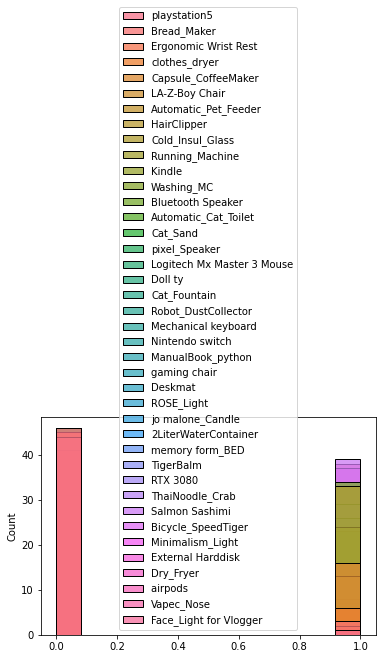

In [7]:
sns.histplot(df)

In [8]:
#frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets = apriori(df, use_colnames=True, min_support=0.1)

In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [10]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(clothes_dryer),(Cold_Insul_Glass),0.127660,0.702128,0.127660,1.000000,1.424242,0.038026,inf
1,(Cold_Insul_Glass),(clothes_dryer),0.702128,0.127660,0.127660,0.181818,1.424242,0.038026,1.066194
2,(Washing_MC),(clothes_dryer),0.510638,0.127660,0.127660,0.250000,1.958333,0.062472,1.163121
3,(clothes_dryer),(Washing_MC),0.127660,0.510638,0.127660,1.000000,1.958333,0.062472,inf
4,(clothes_dryer),(Bluetooth Speaker),0.127660,0.723404,0.106383,0.833333,1.151961,0.014033,1.659574
5,(Bluetooth Speaker),(clothes_dryer),0.723404,0.127660,0.106383,0.147059,1.151961,0.014033,1.022744
6,(2LiterWaterContainer),(clothes_dryer),0.212766,0.127660,0.106383,0.500000,3.916667,0.079221,1.744681
7,(clothes_dryer),(2LiterWaterContainer),0.127660,0.212766,0.106383,0.833333,3.916667,0.079221,4.723404
8,(TigerBalm),(clothes_dryer),0.553191,0.127660,0.106383,0.192308,1.506410,0.035763,1.080041
9,(clothes_dryer),(TigerBalm),0.127660,0.553191,0.106383,0.833333,1.506410,0.035763,2.680851


In [18]:
#CHANGE RULE USE HERE
rules_use = rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.7) &
        (rules['antecedent support'] >= 0.4)]

In [19]:
#rules_use.sort_values(by=['lift'],ascending=False).head(20)
rules_use.sort_values(by=['confidence'],ascending=False).head(60)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14601,"(Salmon Sashimi, TigerBalm, Cold_Insul_Glass)",(Vapec_Nose),0.404255,0.808511,0.404255,1.000000,1.236842,0.077411,inf
4602,"(Salmon Sashimi, TigerBalm)",(Vapec_Nose),0.510638,0.808511,0.510638,1.000000,1.236842,0.097782,inf
28668,"(Salmon Sashimi, TigerBalm, External Harddisk)",(Vapec_Nose),0.446809,0.808511,0.446809,1.000000,1.236842,0.085559,inf
340,(TigerBalm),(Vapec_Nose),0.553191,0.808511,0.531915,0.961538,1.189271,0.084654,4.978723
4604,"(TigerBalm, Vapec_Nose)",(Salmon Sashimi),0.531915,0.829787,0.510638,0.960000,1.156923,0.069262,4.255319
23643,"(Salmon Sashimi, External Harddisk, Bluetooth ...",(Vapec_Nose),0.510638,0.808511,0.489362,0.958333,1.185307,0.076505,4.595745
4685,"(ThaiNoodle_Crab, Vapec_Nose)",(Salmon Sashimi),0.510638,0.829787,0.489362,0.958333,1.154915,0.065641,4.085106
4644,"(TigerBalm, External Harddisk)",(Vapec_Nose),0.489362,0.808511,0.468085,0.956522,1.183066,0.072431,4.404255
28671,"(TigerBalm, External Harddisk, Vapec_Nose)",(Salmon Sashimi),0.468085,0.829787,0.446809,0.954545,1.150350,0.058397,3.744681
1862,"(TigerBalm, Cold_Insul_Glass)",(Vapec_Nose),0.446809,0.808511,0.425532,0.952381,1.177945,0.064282,4.021277


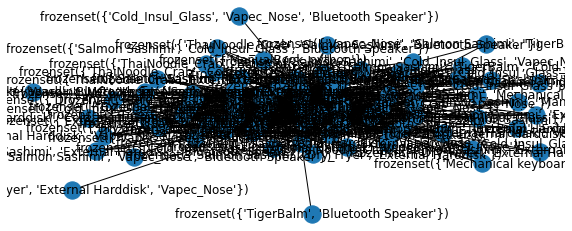

In [20]:
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules_use,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [21]:
Present_df = rules_use
Present_df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
68,(Washing_MC),(Cold_Insul_Glass),0.510638,0.702128,0.425532,0.833333,1.186869,0.066999,1.787234
70,(Cold_Insul_Glass),(Bluetooth Speaker),0.702128,0.723404,0.510638,0.727273,1.005348,0.002716,1.014184
71,(Bluetooth Speaker),(Cold_Insul_Glass),0.723404,0.702128,0.510638,0.705882,1.005348,0.002716,1.012766
80,(Mechanical keyboard),(Cold_Insul_Glass),0.489362,0.702128,0.382979,0.782609,1.114625,0.039384,1.370213
90,(TigerBalm),(Cold_Insul_Glass),0.553191,0.702128,0.446809,0.807692,1.150350,0.058397,1.548936


In [22]:
Present_df = Present_df.rename(columns = {"antecedents": "Already Bought","consequents": "Possible Demand"})
#antecedent support --> Percentage of transaction Contained Already Bought item
#consequent support --> Percentage of transaction Contained Possible Demand item
#support --> Percentage of Basket Contained these 2 items (If more than 2 mean these group
#confidence --> Percentage of Basket Already Bought which also have Possible item
Present_df.sort_values(by=['confidence'],ascending=False).head(60)

,Already Bought,Possible Demand,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14601,"(Salmon Sashimi, TigerBalm, Cold_Insul_Glass)",(Vapec_Nose),0.404255,0.808511,0.404255,1.000000,1.236842,0.077411,inf
4602,"(Salmon Sashimi, TigerBalm)",(Vapec_Nose),0.510638,0.808511,0.510638,1.000000,1.236842,0.097782,inf
28668,"(Salmon Sashimi, TigerBalm, External Harddisk)",(Vapec_Nose),0.446809,0.808511,0.446809,1.000000,1.236842,0.085559,inf
340,(TigerBalm),(Vapec_Nose),0.553191,0.808511,0.531915,0.961538,1.189271,0.084654,4.978723
4604,"(TigerBalm, Vapec_Nose)",(Salmon Sashimi),0.531915,0.829787,0.510638,0.960000,1.156923,0.069262,4.255319
23643,"(Salmon Sashimi, External Harddisk, Bluetooth ...",(Vapec_Nose),0.510638,0.808511,0.489362,0.958333,1.185307,0.076505,4.595745
4685,"(ThaiNoodle_Crab, Vapec_Nose)",(Salmon Sashimi),0.510638,0.829787,0.489362,0.958333,1.154915,0.065641,4.085106
4644,"(TigerBalm, External Harddisk)",(Vapec_Nose),0.489362,0.808511,0.468085,0.956522,1.183066,0.072431,4.404255
28671,"(TigerBalm, External Harddisk, Vapec_Nose)",(Salmon Sashimi),0.468085,0.829787,0.446809,0.954545,1.150350,0.058397,3.744681
1862,"(TigerBalm, Cold_Insul_Glass)",(Vapec_Nose),0.446809,0.808511,0.425532,0.952381,1.177945,0.064282,4.021277


In [23]:
Present_df.sort_values(by=['confidence'],ascending=False).head(60)

,Already Bought,Possible Demand,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14601,"(Salmon Sashimi, TigerBalm, Cold_Insul_Glass)",(Vapec_Nose),0.404255,0.808511,0.404255,1.000000,1.236842,0.077411,inf
4602,"(Salmon Sashimi, TigerBalm)",(Vapec_Nose),0.510638,0.808511,0.510638,1.000000,1.236842,0.097782,inf
28668,"(Salmon Sashimi, TigerBalm, External Harddisk)",(Vapec_Nose),0.446809,0.808511,0.446809,1.000000,1.236842,0.085559,inf
340,(TigerBalm),(Vapec_Nose),0.553191,0.808511,0.531915,0.961538,1.189271,0.084654,4.978723
4604,"(TigerBalm, Vapec_Nose)",(Salmon Sashimi),0.531915,0.829787,0.510638,0.960000,1.156923,0.069262,4.255319
23643,"(Salmon Sashimi, External Harddisk, Bluetooth ...",(Vapec_Nose),0.510638,0.808511,0.489362,0.958333,1.185307,0.076505,4.595745
4685,"(ThaiNoodle_Crab, Vapec_Nose)",(Salmon Sashimi),0.510638,0.829787,0.489362,0.958333,1.154915,0.065641,4.085106
4644,"(TigerBalm, External Harddisk)",(Vapec_Nose),0.489362,0.808511,0.468085,0.956522,1.183066,0.072431,4.404255
28671,"(TigerBalm, External Harddisk, Vapec_Nose)",(Salmon Sashimi),0.468085,0.829787,0.446809,0.954545,1.150350,0.058397,3.744681
1862,"(TigerBalm, Cold_Insul_Glass)",(Vapec_Nose),0.446809,0.808511,0.425532,0.952381,1.177945,0.064282,4.021277


1) rules_use = lift >= 1, confidence >= 0.7, antecedent support >= 0.4
2) Sort Recommended System by confidence
Example Use Case: After received transaction information. If found couple of antecedents(Already Bought) and consequents(Possible Demand but no previous transaction within approximate item lifetime). Send in personal ads